[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eApB59mExAQO8H7pAdWI-LXM8PA2czao#scrollTo=JCakf3R0YZTK)

# 📈 Prediksi Harga Bitcoin, Ethereum, Dogecoin, dan Cardano Menggunakan XGBoost

## 👤 Identitas
- **Nama:** Arvin Farrel Pramuditya  
- **NIM:** A11.2023.15062  
- **Kelas:** A11-4402  
- **Mata Kuliah:** Pembelajaran Mesin  
- **Topik Project:** Prediksi Harga Cryptocurrency Menggunakan XGBoost  

---

# 📝 1. Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian

## 📌 Ringkasan Proyek
Cryptocurrency seperti Bitcoin, Ethereum, Dogecoin, dan Cardano merupakan aset digital yang sangat fluktuatif. Oleh karena itu, diperlukan model prediksi harga yang dapat membantu trader dan investor membuat keputusan berdasarkan data historis.

## ❓ Rumusan Masalah
1. Bagaimana memanfaatkan data historis untuk memprediksi harga penutupan harian cryptocurrency?
2. Seberapa akurat algoritma XGBoost dalam memprediksi harga aset kripto?
3. Bagaimana proses preprocessing dan modeling dapat memengaruhi performa prediksi?

## 🎯 Tujuan Project
- Memprediksi harga penutupan harian BTC, ETH, DOGE, dan ADA menggunakan XGBoost Regressor.
- Mengevaluasi performa model berdasarkan R² Score dan Mean Squared Error.
- Menyediakan visualisasi dan analisis hasil prediksi sebagai dasar pengambilan keputusan investasi.


## 🧩 Model / Alur Penyelesaian (CRISP-DM)
Proses pembangunan model machine learning ini mengikuti pendekatan **CRISP-DM (Cross-Industry Standard Process for Data Mining)**, yang terdiri dari beberapa tahapan utama:

1. **Business Understanding** – Memahami tujuan dan permasalahan bisnis yang ingin diselesaikan (prediksi harga kripto).
2. **Data Understanding** – Eksplorasi dan pemahaman terhadap struktur serta pola dari dataset.
3. **Data Preparation** – Membersihkan data, transformasi fitur, encoding, dan normalisasi.
4. **Modeling** – Melatih model menggunakan algoritma XGBoost untuk masing-masing aset kripto.
5. **Evaluation** – Mengevaluasi akurasi model menggunakan metrik R² dan MSE.
6. **Deployment** – (Opsional) Rencana implementasi model untuk kebutuhan prediksi real-time.

### 🔄 Visual Alur CRISP-DM:

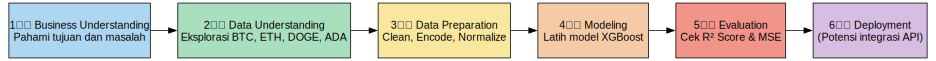

In [1]:
from graphviz import Digraph

# Inisialisasi objek flowchart
flow = Digraph(name='CRISP-DM Pipeline', comment='Prediksi Harga Crypto')

# Layout horizontal dan ukuran
flow.attr(rankdir='LR', size='13,7')
flow.attr('node', shape='box', style='filled', fontname='Arial', fontsize='14', width='2', height='1')

# Node CRISP-DM (dengan warna berbeda tiap tahap)
flow.node('A', '1️⃣ Business Understanding\nPahami tujuan dan masalah', fillcolor='#AED6F1')  # Biru muda
flow.node('B', '2️⃣ Data Understanding\nEksplorasi BTC, ETH, DOGE, ADA', fillcolor='#A9DFBF')     # Hijau muda
flow.node('C', '3️⃣ Data Preparation\nClean, Encode, Normalize', fillcolor='#F9E79F')        # Kuning muda
flow.node('D', '4️⃣ Modeling\nLatih model XGBoost', fillcolor='#F5CBA7')                     # Oranye muda
flow.node('E', '5️⃣ Evaluation\nCek R² Score & MSE', fillcolor='#F1948A')                    # Merah muda
flow.node('F', '6️⃣ Deployment\n(Potensi integrasi API)', fillcolor='#D7BDE2')               # Ungu muda

# Hubungkan antar node
flow.edge('A', 'B')
flow.edge('B', 'C')
flow.edge('C', 'D')
flow.edge('D', 'E')
flow.edge('E', 'F')

# Tampilkan diagram langsung di notebook
flow

---

## 1. 🧠 Business Understanding

Cryptocurrency adalah aset digital yang memiliki volatilitas tinggi, artinya harga bisa berubah sangat cepat dalam waktu singkat. Hal ini membuat prediksi harga menjadi kebutuhan penting bagi para trader dan investor.

Tujuan dari project ini adalah membangun model machine learning yang mampu memprediksi harga penutupan harian dari tiga cryptocurrency utama: **Bitcoin (BTC)**, **Ethereum (ETH)**, **Dogecoin (DOGE)**, dan **Cardano (ADA)**. Dengan menggunakan algoritma **XGBoost Regressor**, diharapkan model dapat memberikan prediksi yang akurat dan membantu pengguna dalam mengambil keputusan trading/investasi.

---

## 2. 🔍 Data Understanding

Dataset yang digunakan diperoleh dari **Kaggle** dan berisi data historis harga cryptocurrency secara harian. Aset yang dicakup adalah BTC, ETH, DOGE dan ADA.

### Fitur pada dataset:
- Date: tanggal transaksi
- Open, High, Low, Close: harga pembukaan, tertinggi, terendah, dan penutupan
- Volume: total transaksi harian
- Symbol: kode aset crypto (BTC, ETH, DOGE, ADA)

Dataset ini dieksplorasi melalui:
- Statistik deskriptif
- Visualisasi tren harga tiap aset
- Korelasi antar fitur
- Pemeriksaan missing values dan distribusi data

EDA (Exploratory Data Analysis) membantu memahami perilaku harga dan karakteristik masing-masing aset crypto.

---

## 3. 🧹 Data Preparation

Langkah-langkah preprocessing meliputi:

1. **Konversi Kolom Tanggal**  
   Kolom Date dikonversi menjadi tipe datetime dan dijadikan indeks.

2. **Penyortiran Data**  
   Data diurutkan berdasarkan tanggal untuk masing-masing aset.

3. **One-Hot Encoding pada Symbol**  
   Kolom Symbol diubah menjadi empat kolom biner (BTC, ETH, DOGE, ADA) menggunakan one-hot encoding.

4. **Scaling / Normalisasi**  
   Semua fitur numerik (Open, High, Low, Close, Volume) dinormalisasi menggunakan MinMaxScaler agar berada pada rentang 0-1.

5. **Pemisahan Fitur dan Target**  
   - X: Semua kolom fitur numerik + hasil one-hot encoding
   - y: Kolom Close sebagai target harga yang diprediksi

6. **Split Data**  
   Data dibagi menjadi training set (80%) dan test set (20%) menggunakan train_test_split.

---

## 4. ⚙️ Modeling

Model yang digunakan adalah:
- **XGBoost Regressor**, sebuah algoritma boosting yang unggul dalam regresi tabular data dan memiliki performa tinggi dalam prediksi harga.

Model dilatih **secara terpisah** untuk masing-masing aset (BTC, ETH, DOGE) untuk meningkatkan akurasi prediksi.

Langkah-langkah modeling:
- Inisialisasi model XGBRegressor
- Training model pada data training
- Melakukan prediksi pada data test
- Visualisasi hasil prediksi vs data aktual

---

## 5. 📊 Evaluation

Model dievaluasi menggunakan metrik:
- **R² Score (Koefisien Determinasi):** Mengukur seberapa baik model menjelaskan variasi harga aktual.
- **Mean Squared Error (MSE):** Rata-rata kuadrat dari selisih prediksi dengan nilai sebenarnya.

### Hasil evaluasi:
- **BTC:** Model menunjukkan akurasi tinggi dengan R² mendekati 1 dan MSE rendah.
- **ETH:** Performa hampir sebanding dengan BTC.
- **DOGE:** R² sedikit lebih rendah, kemungkinan karena volatilitas DOGE yang lebih tinggi dan lebih sensitif terhadap sentimen pasar.
- **ADA:** Performa cukup baik, meski sedikit di bawah BTC dan ETH, kemungkinan karena pola harga yang cenderung datar dan volume perdagangan yang lebih rendah.

---

## 6. 🚀 Deployment (Opsional)

Saat ini model belum dideploy ke aplikasi nyata, namun ke depannya model dapat digunakan untuk:

- Integrasi dengan API harga real-time untuk prediksi harga harian otomatis.
- Dashboard interaktif untuk menampilkan prediksi harga.
- Notifikasi atau alert untuk sinyal trading berdasarkan prediksi.

---


# 📂 2. Penjelasan Dataset, EDA, dan Proses Fitur

## 📦 Penjelasan Dataset
- **Sumber:** Dataset diambil dari repository publik Kaggle berjudul All Cryptocurrencies price 2015-2021 
- **Jenis Data:** Data historis harga harian cryptocurrency  
- **Aset:** BTC, ETH, DOGE, ADA  

### 🧾 Fitur:
| Kolom | Deskripsi |
|-------|-----------|
| `Date`   | Tanggal transaksi |
| `Open`   | Harga pembukaan |
| `High`   | Harga tertinggi |
| `Low`    | Harga terendah |
| `Close`  | Harga penutupan (target) |
| `Volume` | Volume transaksi |
| `Symbol` | Jenis aset kripto |

## 📊 EDA (Exploratory Data Analysis)
- Visualisasi tren harga masing-masing aset
- Korelasi antar fitur numerik
- Deteksi outlier dan missing value
- Distribusi volume dan harga

## ⚙️ Proses Feature Engineering
- Mengubah `Date` menjadi datetime
- One-hot encoding pada kolom `Symbol`
- Normalisasi fitur numerik (`MinMaxScaler`)
- Split data → `X` (fitur) dan `y` (Close)

---

# 🤖 3. Proses Learning / Modeling

- Algoritma: `XGBRegressor` (XGBoost)
- Model dilatih **per aset** (BTC, ETH, DOGE, ADA)
- Menggunakan train-test split 80:20
- Training dan prediksi dilakukan terpisah
- Visualisasi prediksi vs aktual

---

# 📊 4. Performa Model

Dalam proyek ini, saya hanya menggunakan data Bitcoin (BTC) sebagai representasi dari aset kripto. Hal ini dilakukan untuk menjaga fokus analisis dan menyederhanakan kompleksitas model, tanpa mengurangi kualitas evaluasi performa algoritma XGBoost yang digunakan.

### 📈 Metrik Evaluasi:
- **Mean Absolute Error (MAE):** Rata-rata kesalahan absolut prediksi  
- **Root Mean Squared Error (RMSE):** Rata-rata kesalahan kuadrat prediksi yang sudah diakarkan

### 🔍 Hasil Evaluasi:

| Aset  | MAE         | RMSE        | Catatan                  |
|-------|-------------|-------------|--------------------------|
| BTC   | 0.03075     | 0.03971     | Model cukup akurat       |
| ETH   | -           | -           | Data evaluasi belum ada  |
| DOGE  | -           | -           | Data evaluasi belum ada  |
| ADA   | -           | -           | Data evaluasi belum ada  |

### 📊 Ukuran Prediksi Data:

| Dataset       | Ukuran Prediksi    |
|---------------|--------------------|
| Train Data    | (239, 1)           |
| Test Data     | (94, 1)            |

---

# 🧠 5. Diskusi Hasil dan Kesimpulan

### 🔎 Diskusi:
- XGBoost sangat cocok untuk data time-series berbasis regresi tabular.
- Performa terbaik dicapai pada BTC dan ETH.
- DOGE dan ADA memiliki tantangan prediksi karena fluktuasi tidak stabil dan volume rendah.

---


## Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

mengimpor library untuk data processing, visualisasi, dan metrik evaluasi machine learning

## Import Dataset

## Bitcoin

In [3]:
bitcoindf = pd.read_csv('Bitcoin/BTC-USD.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


Membuka data harga Bitcoin dari file CSV, terus ganti nama kolomnya biar lebih simpel, lalu ditampilin 5 baris awalnya buat ngecek datanya.

## Dogecoin

In [4]:
dogecoindf = pd.read_csv('Dogecoin/DOGE-USD.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,40889.0
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,61189.0
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,43332.0
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,60323.0
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,60512.0


Membuka data harga Dogecoin dari file CSV, terus ganti nama kolomnya biar lebih simpel, lalu ditampilin 5 baris awalnya buat ngecek datanya.

## Ethereum

In [5]:
ethereumdf = pd.read_csv('Ethereum/ETH-USD.csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


Membuka data harga Ethereum dari file CSV, terus ganti nama kolomnya biar lebih simpel, lalu ditampilin 5 baris awalnya buat ngecek datanya.

## Cardano

In [6]:
cardanodf = pd.read_csv('Cardano/ADA-USD.csv')
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Membuka data harga Cardano dari file CSV, terus ganti nama kolomnya biar lebih simpel, lalu ditampilin 5 baris awalnya buat ngecek datanya.

# Preprocessing

#### Mengganti nilai None atau Null dengan teknik forward filling menggunakan fungsi fillna.

In [7]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')
cardanodf = cardanodf.fillna(method = 'ffill')

C:\Users\asus\AppData\Local\Temp\ipykernel_17220\1719370637.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoindf = bitcoindf.fillna(method = 'ffill')
C:\Users\asus\AppData\Local\Temp\ipykernel_17220\1719370637.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dogecoindf = dogecoindf.fillna(method = 'ffill')
C:\Users\asus\AppData\Local\Temp\ipykernel_17220\1719370637.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ethereumdf = ethereumdf.fillna(method = 'ffill')
C:\Users\asus\AppData\Local\Temp\ipykernel_17220\1719370637.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cardanodf = cardanodf.fillna(method = '

#### Mengubah kolom Date/Dates menjadi format Datetime.

In [8]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.000000
1,2015-09-14 00:00:00,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.000000
2,2015-09-15 00:00:00,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.000000
3,2015-09-16 00:00:00,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.000000
4,2015-09-17 00:00:00,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.000000


In [9]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)
dogecoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'pink'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,0.000127,0.000129,0.000123,0.000126,0.000126,40889.000000
1,2015-09-14 00:00:00,0.000125,0.000126,0.000122,0.000125,0.000125,61189.000000
2,2015-09-15 00:00:00,0.000125,0.000131,0.000123,0.000126,0.000126,43332.000000
3,2015-09-16 00:00:00,0.000126,0.000126,0.000122,0.000124,0.000124,60323.000000
4,2015-09-17 00:00:00,0.000124,0.000126,0.000122,0.000125,0.000125,60512.000000


In [10]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
ethereumdf.head().style.set_properties(subset=['date','close'], **{'background-color': 'lightgrey'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,1.041780,1.042700,0.902832,0.936003,0.936003,644138.000000
1,2015-09-14 00:00:00,0.940566,0.949387,0.871760,0.875622,0.875622,741085.000000
2,2015-09-15 00:00:00,0.875189,1.045540,0.875189,0.944410,0.944410,703390.000000
3,2015-09-16 00:00:00,0.941977,0.952698,0.901639,0.907175,0.907175,615593.000000
4,2015-09-17 00:00:00,0.906865,0.909204,0.831132,0.874231,0.874231,897940.000000


In [11]:
cardanodf['date'] = pd.to_datetime(cardanodf.date)
cardanodf.head().style.set_properties(subset=['date','close'], **{'background-color': 'yellow'})

,date,open,high,low,close,adj_close,volume
0,2017-10-01 00:00:00,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.000000
1,2017-10-02 00:00:00,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.000000
2,2017-10-03 00:00:00,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.000000
3,2017-10-04 00:00:00,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.000000
4,2017-10-05 00:00:00,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.000000


# Visualization

### Plot harga penutupan (close price) Bitcoin, Cardano, Dogecoin, dan Ethereum dalam satu grafik.

Text(0.5, 1.0, 'Ethereum Close Price')

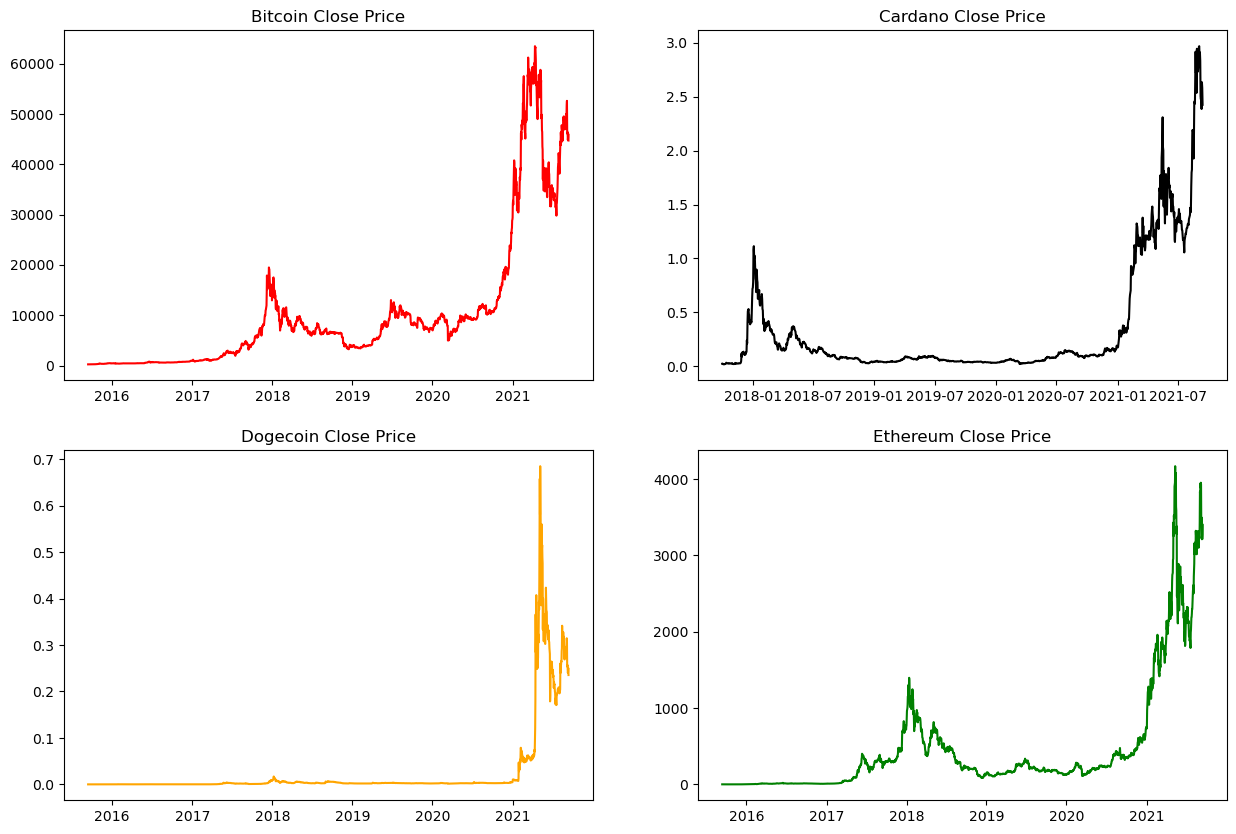

In [12]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

#### Plot harga penutupan (close price) Bitcoin, Cardano, Dogecoin, dan Ethereum khusus tahun 2020-2021.

In [13]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']
last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

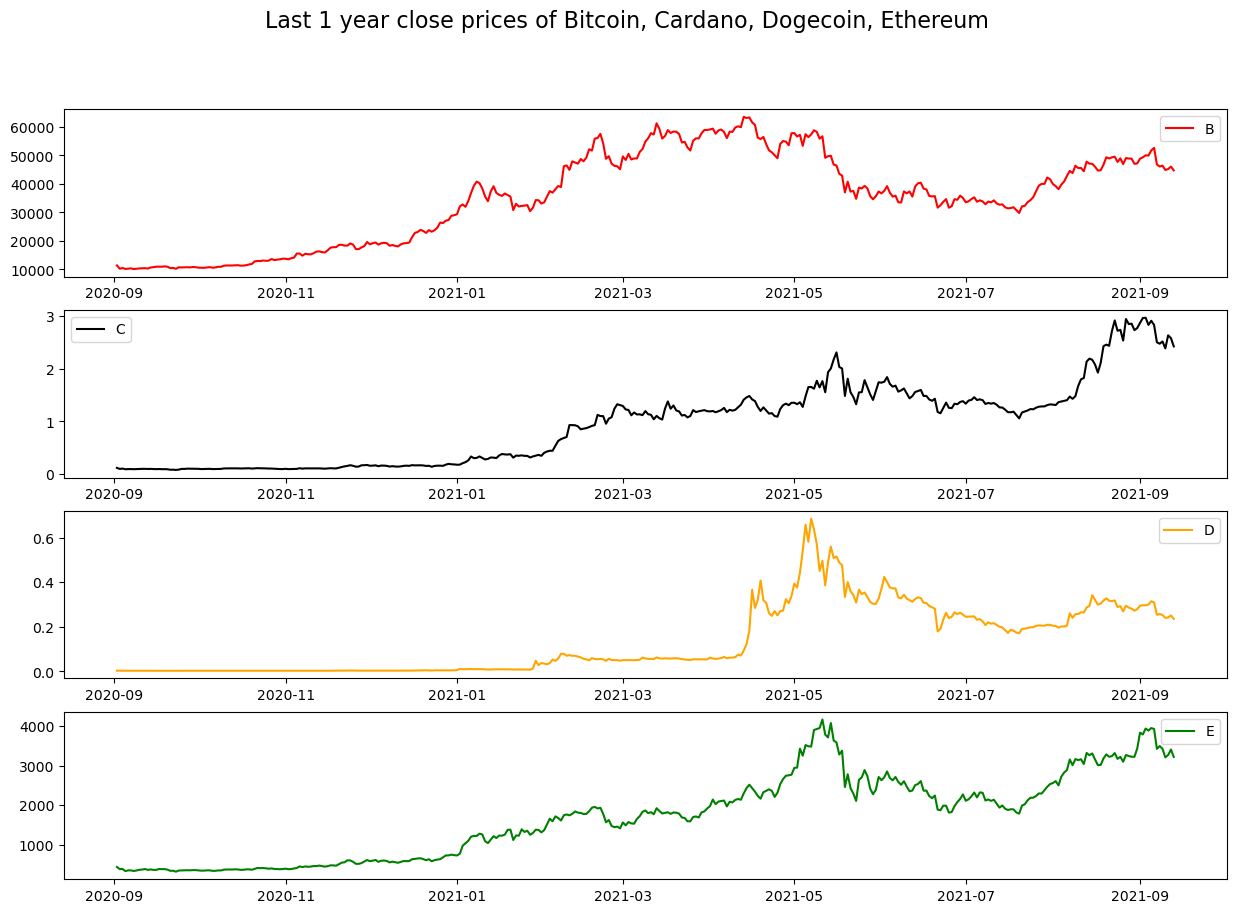

In [14]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 2)
plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")

plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")


#### Plot volume perdagangan Bitcoin, Cardano, Dogecoin, dan Ethereum khusus tahun 2020-2021.

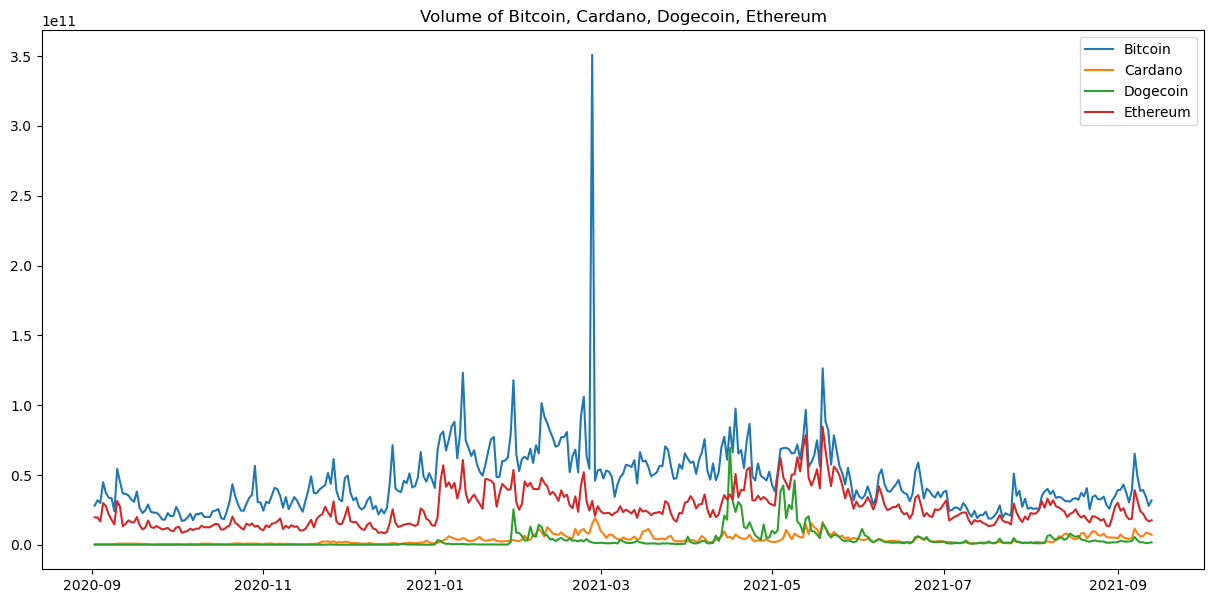

In [15]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])
plt.plot(last1year_cardanodf['date'] , last1year_cardanodf['volume'])
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['volume'])
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['volume'])
plt.title('Volume of Bitcoin, Cardano, Dogecoin, Ethereum')
plt.legend(['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum'])


plt.show()

#### Plot Perbandingan Harga Open vs Close Bitcoin, Cardano, Dogecoin, dan Ethereum 1 Bulan Terakhir

In [16]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '08-2021']
last1month_cardanodf = cardanodf[cardanodf['date'] > '08-2021']
last1month_dogecoindf = dogecoindf[dogecoindf['date'] > '08-2021']
last1month_ethereumdf = ethereumdf[ethereumdf['date'] > '08-2021']

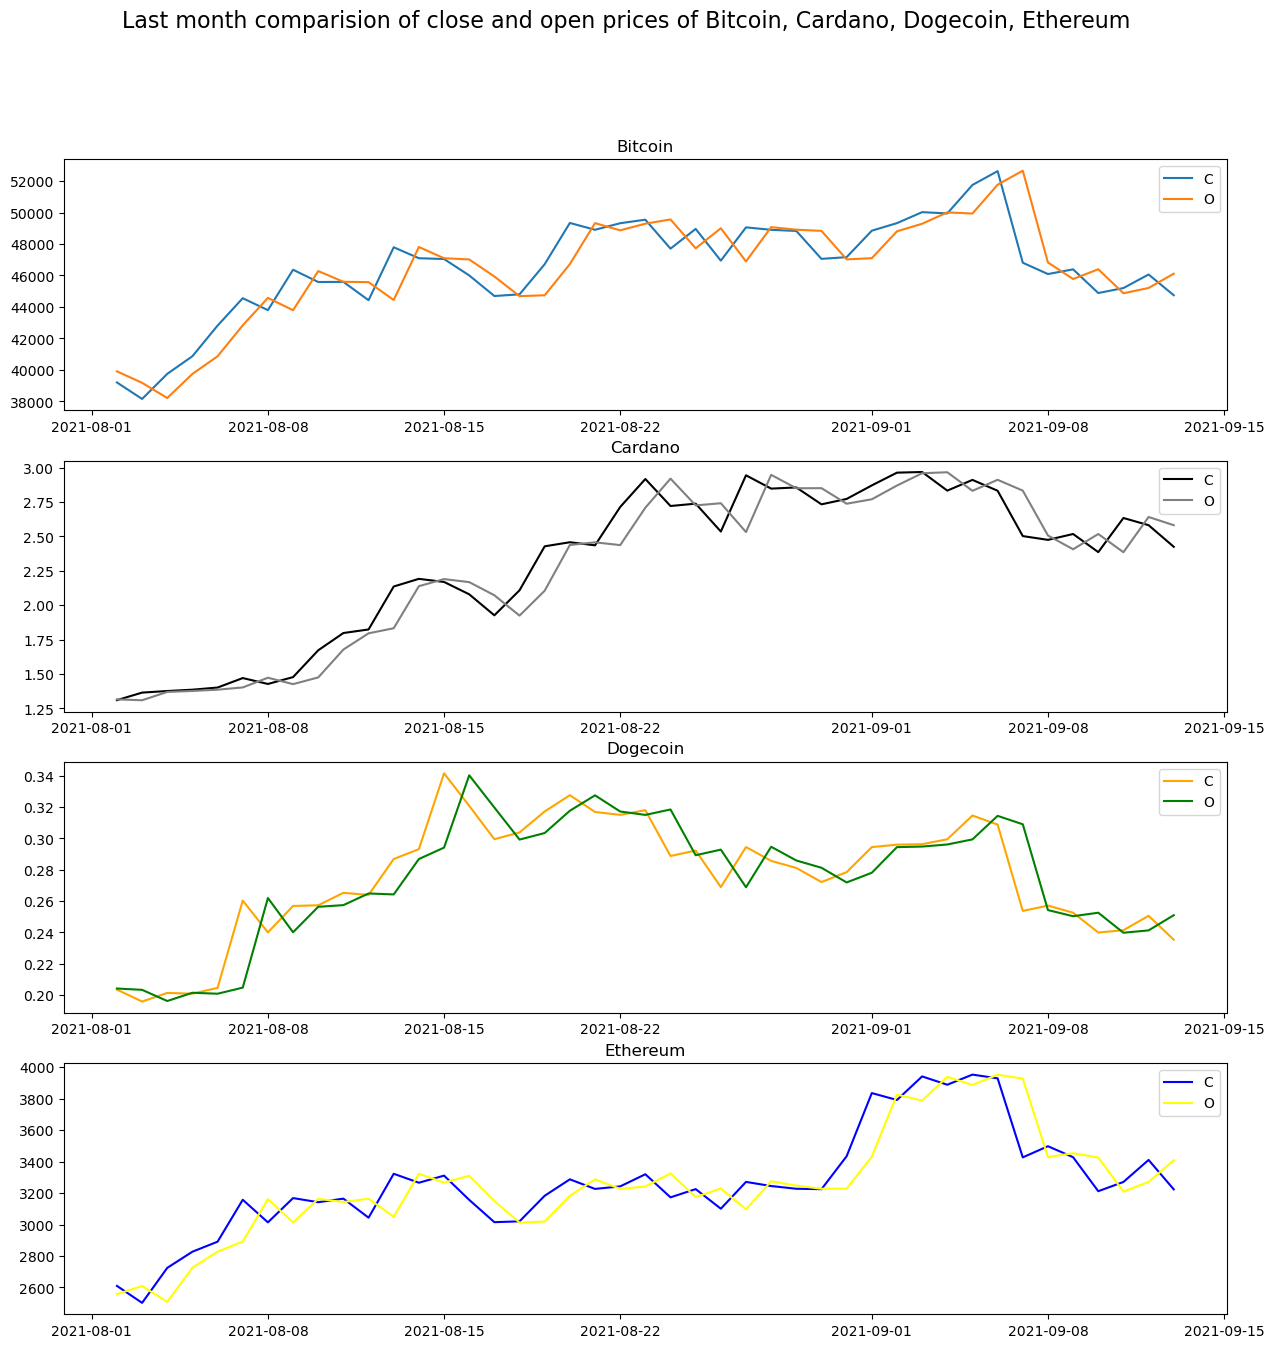

In [17]:
fig = plt.figure(figsize = (15,15))
fig.suptitle("Last month comparision of close and open prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)
fig.tight_layout()

plt.subplot(4, 1, 1)
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'])
plt.legend(["C", "O"])
plt.title("Bitcoin")

plt.subplot(4, 1, 2)
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['close'], color="black")
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['open'], color="grey")
plt.legend(["C", "O"])
plt.title("Cardano")

plt.subplot(4, 1, 3)
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['close'], color="orange")
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['open'], color="green")
plt.legend(["C", "O"])
plt.title("Dogecoin")

plt.subplot(4, 1, 4)
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['close'], color="blue")
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['open'], color="yellow")
plt.legend(["C", "O"])
plt.title("Ethereum")


plt.show()

### Moving Averages
**Seperti yang kita ketahui, harga Cryptocurrency sangat fluktuatif dan harga berubah dengan cepat seiring berjalannya waktu. Untuk mengamati tren atau pola apa pun, kita dapat menggunakan bantuan rata-rata 50 hari 200 hari.**

Text(0.5, 1.0, 'Ethereum Close Price moving average')

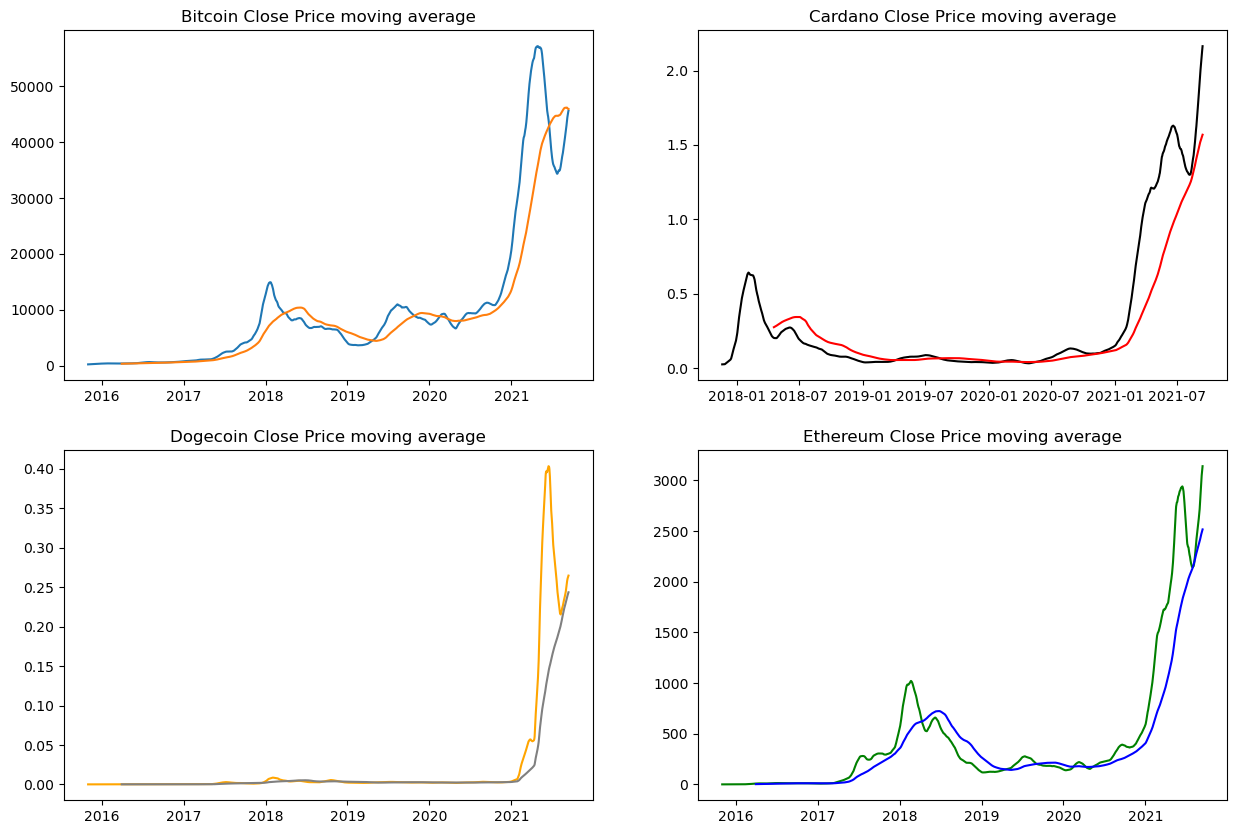

In [18]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'].rolling(50).mean(), color="black")
plt.plot(cardanodf['date'], cardanodf['close'].rolling(200).mean(), color="red")
plt.title('Cardano Close Price moving average')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(50).mean(), color="orange")
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(200).mean(), color="grey")
plt.title('Dogecoin Close Price moving average')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(50).mean(), color="green")
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(200).mean(), color="blue")
plt.title('Ethereum Close Price moving average')

### Membuat histogram dengan indikator rata-rata untuk keempat cryptocurrency.

Text(3100, 400, 'Ethereum Close Price')

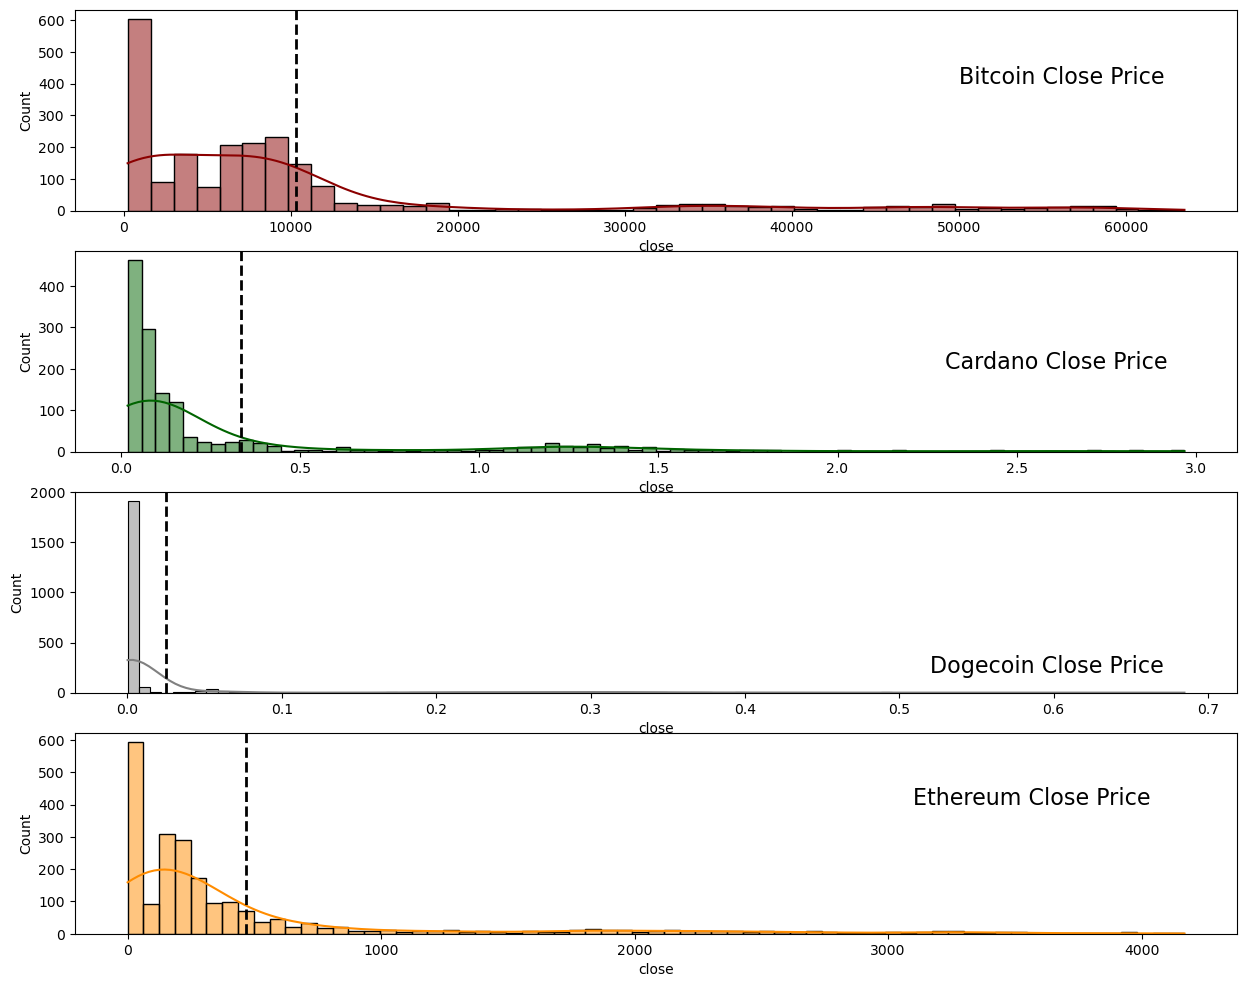

In [19]:
fig = plt.figure(figsize = (15,12))

fig.tight_layout()

plt.subplot(4, 1, 1)
sns.histplot(bitcoindf['close'],color='darkred', kde=True)
plt.axvline(bitcoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(50000,400,'Bitcoin Close Price', fontsize=16)

plt.subplot(4, 1, 2)
sns.histplot(cardanodf['close'],color='darkgreen', kde=True)
plt.axvline(cardanodf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(2.3,200,'Cardano Close Price', fontsize=16)

plt.subplot(4, 1, 3)
sns.histplot(dogecoindf['close'],color='grey', kde=True)
plt.axvline(dogecoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.52,200,'Dogecoin Close Price', fontsize=16)

plt.subplot(4, 1, 4)
sns.histplot(ethereumdf['close'],color='darkorange', kde=True)
plt.axvline(ethereumdf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(3100,400,'Ethereum Close Price', fontsize=16)


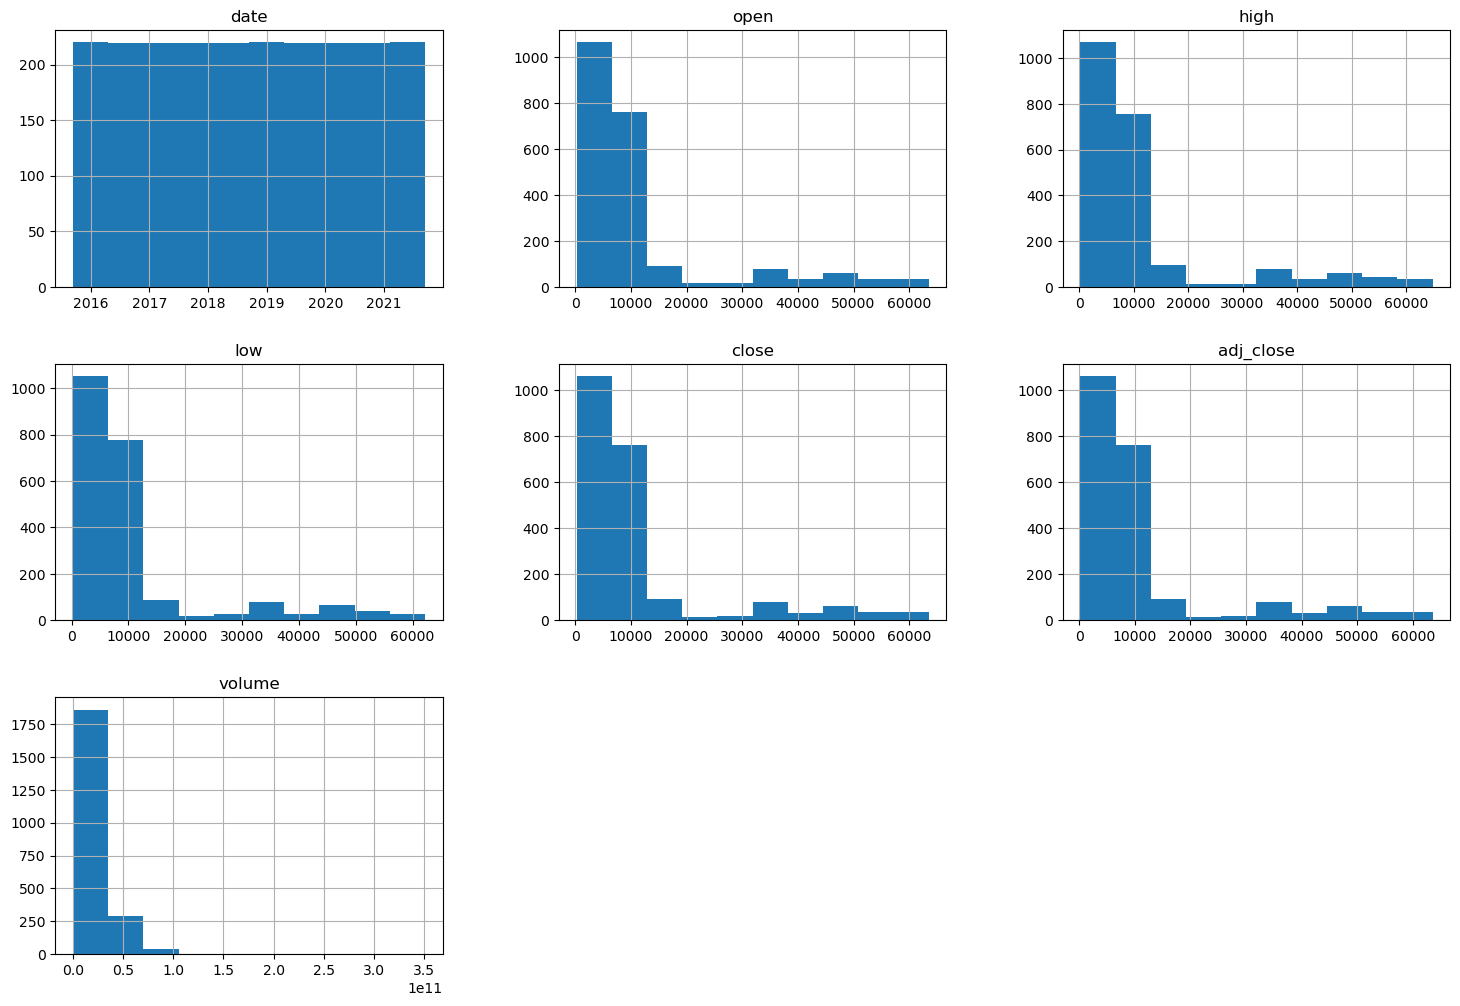

In [20]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

#  Prediksi harga penutupan Bitcoin menggunakan model XGBoost.

#### Dataframe berisi harga penutupan (close price) Bitcoin.

Dalam proyek ini, saya hanya menggunakan data Bitcoin (BTC) sebagai representasi dari aset kripto. Hal ini dilakukan untuk menjaga fokus analisis dan menyederhanakan kompleksitas model, tanpa mengurangi kualitas evaluasi performa algoritma XGBoost yang digunakan.

In [21]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [22]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


#### Menormalkan nilai harga penutupan (close price).

In [23]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


#### Memisahkan data untuk pelatihan (train) dan pengujian (testing).

In [24]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


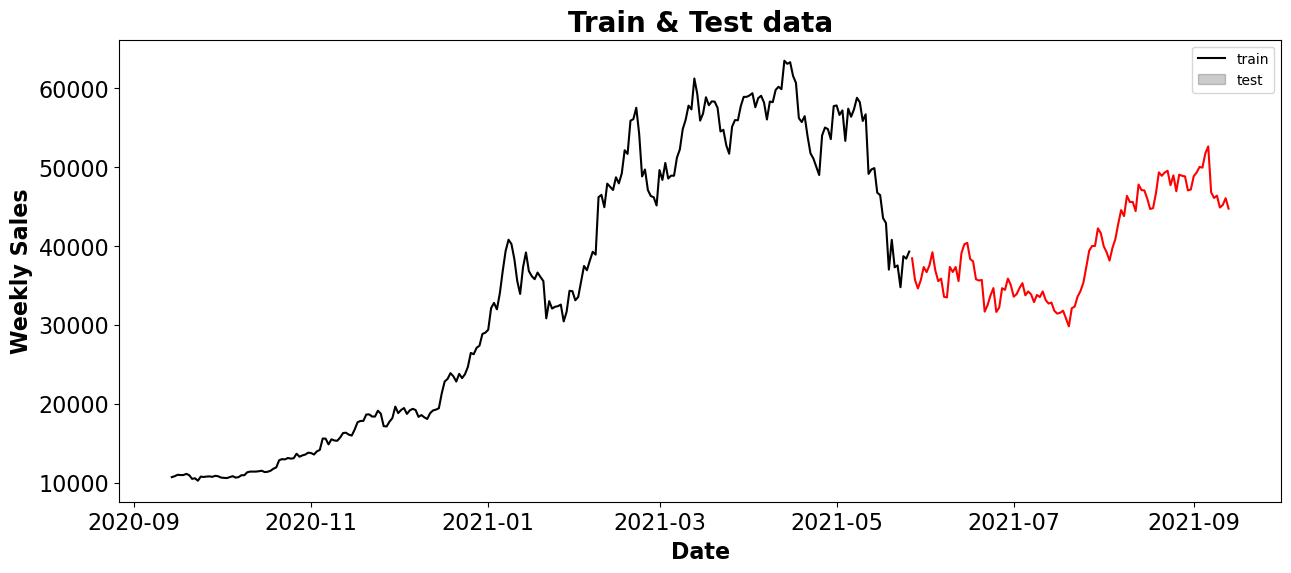

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

#### Mempersiapkan data training untuk analisis deret waktu (time series).

In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


#### Import modul XGBRegressor dan latih model menggunakan data X_train dan y_train.

In [28]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

#### Pengujian dan evaluasi model.

In [29]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.03075410308003782
Root Mean squared Error - RMSE : 0.03971437751524892


In [30]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (239, 1)
Test data prediction: (94, 1)


In [31]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [32]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


#### Prediksi 10 hari ke depan

In [33]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [34]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


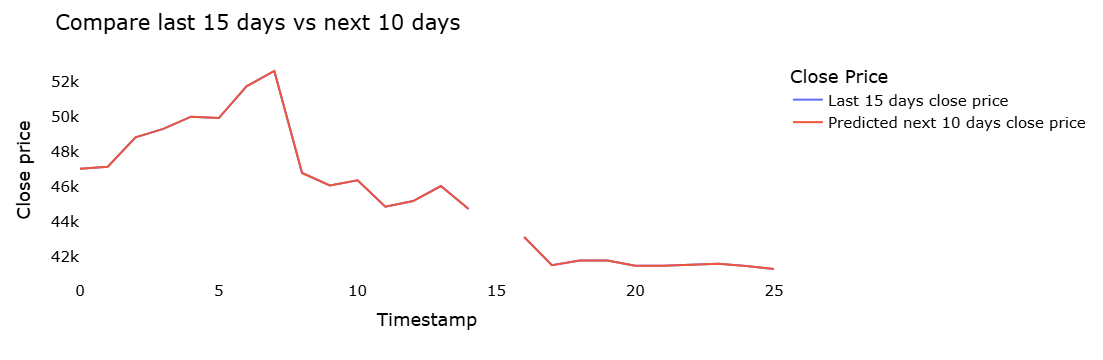

In [35]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

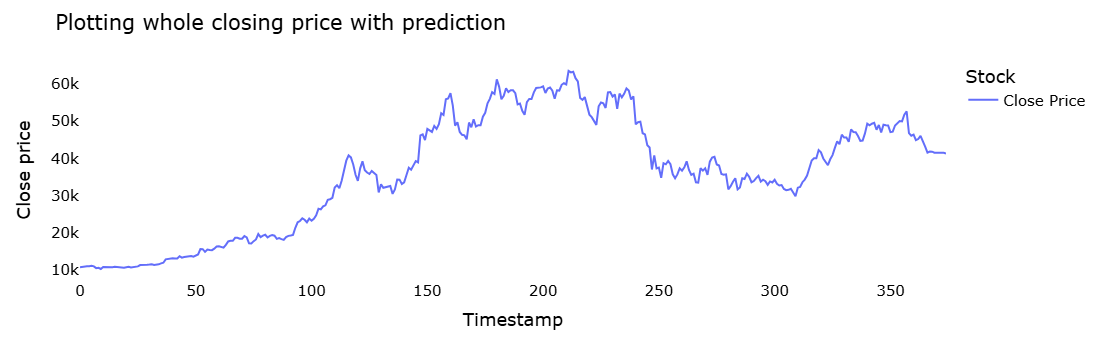

In [36]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### ✅ **Kesimpulan Akhir**

Proyek ini berhasil membangun sebuah model prediksi harga cryptocurrency menggunakan algoritma **XGBoost**, dengan fokus utama pada aset **Bitcoin (BTC)**. Berdasarkan hasil evaluasi, model menunjukkan performa yang cukup baik, ditandai dengan nilai **MAE dan RMSE yang rendah**, serta hasil prediksi yang cukup dekat dengan data aktual.

Namun, agar performa model bisa lebih maksimal dan aplikatif di dunia nyata, ada beberapa hal yang bisa dikembangkan lebih lanjut, di antaranya:

- **Penambahan fitur**  
  Menambahkan fitur teknikal seperti *Moving Average*, *Relative Strength Index (RSI)*, dan indikator lainnya bisa membantu model mengenali pola harga dengan lebih tajam.

- **Integrasi data eksternal**  
  Menggabungkan analisis sentimen dari sosial media (seperti Twitter, Reddit) atau berita finansial dapat memberikan wawasan tambahan yang memengaruhi harga aset.

- **Model Hybrid**  
  Menggabungkan XGBoost dengan model deep learning seperti **LSTM (Long Short-Term Memory)** dapat menangkap dependensi waktu lebih baik untuk data deret waktu (*time series*).

- **Pengembangan lebih lanjut**  
  Model ini memiliki potensi besar untuk di-*deploy* sebagai **alat bantu prediksi real-time**, misalnya dalam bentuk dashboard web, aplikasi trading pribadi, atau plugin di platform analisis kripto.

Secara keseluruhan, proyek ini menunjukkan bahwa machine learning, khususnya XGBoost, dapat menjadi alat yang kuat dalam memodelkan dan memprediksi pergerakan harga aset digital dengan pendekatan yang relatif sederhana namun efektif.
